# Data Bootcamp Final Project: Campaign Success on Kickstarter
<br>
<div class="inline-block"> <img src="https://www.kickstarter.com/download/kickstarter-logo-light.png"/> </div>
<br>

**Authors: <br>**
Christine Dah-In Chung (cic266@nyu.edu), Oleksandr Petriv (osp213@nyu.edu)

Crowdfunding platforms have increased in popularity for financially supporting innovative project ideas. These platforms allow creative people to make their own product if there is enough interest from the public (project backers). For campaign managers who use crowdfunding platforms such as Kickstarter it is vital to understand what key aspects of their campaign could potentially increase the probability of their success. 

For the sake of clarity, we define the "success" of a project by the percentage of funding received. A successful campaign would be one that received at least 100% of its goal. According to Kickstarter policies (as of 2017), only campaigns that reached at least 100% of their goal will receive the funding. Otherwise, all pledged money will return to campaign backers.

Our team believes that there are a number of factors that can affect the probability of creating a successful campaign such as: category in which the campaign is run, length of campaign's name, its funding goal, duration of the campaign etc. 

In this project we attempt to compare successful and failed Kickstarter campaigns in the United States over the period from 2010 until the end of 2016 through the prism of factors outlined above. In our analysis of Kickstarter's historical data, we strive to identify the key elements that could help a crowdfunding campaign to become successful. Our findings would potentially serve as a guide to maximize the likelihood of a campaign's success for both new and experienced crowdfunding campaign managers. Our data is taken from ks-projects-201612.csv, a dataset posted on Kaggle that includes information on more than 300,000 campaigns posted on Kickstarter during 2010-2016.

This project explores the following question:
* **How do different factors of a project lead to its success/failure? Do these factors have a common pattern we can recognize and utlize to predict the likelihood of a project's success?**

We will take the following steps for structure:
1. Data Report - Describe the dataset and its source
2. Packages - Import packages and discuss tools needed
3. Data Organization - Organize and manipulate the data
4. Data Analysis - Display data and analyze our findings
5. Limitations - Discuss the limitations of the project
6. Conclusion - Discuss the summary, limitations, future steps, and challenges

## Data Report
The dataset used in this project is all in one csv file called `ks-projects-201612.csv`. It was posted on [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects/data), and includes information on more than 300,000 Kickstarter campaigns from 2010 to 2016. Although the source did not clarify how and from where the data was taken, we confirmed its accuracy by comparing it with a relevant [source](http://icopartners.com/2017/01/kickstarter-in-2016-year-in-review/), ICO Partners Consulting Firm, which reviewed Kickstarter projects in 2016.

Since the file is in `.csv` format, it is easy for us to use the `pd.read_csv` command to retrieve the data. However, the encoding was not in the standard format, so we needed to convert it to the appropriate one: `latin1`.

The file contains the project information as the following variables (the ones used in this project are in bold):
- ID
- **Name**
- category
- **main_category**
- currency
- deadline
- **goal**
- launched
- pledged
- **state** (successful, failed, canceled, etc)
- backers
- **country**
- usd pledged

Since the data can only be accessed with a login, we will be taking it directly from the file saved on Christine's local computer.

## Packages
The following packages are used in this project:
- `display` package - displays an output in a visually appealing way
- `Pandas` package - the main tool used to work with data (import, manipulate, merge, analyze)
- `Matplotlib` package - assists in plotting
- `numpy` - allows mathematical operations on data

In [567]:
from IPython.display import display, Image # visually appealing display
import pandas as pd # main tool to work with data
import matplotlib.pyplot as plt # plotting
import numpy as np # mathematical operations
import plotly.plotly as py
import datetime
from datetime import datetime

## Data Organization
We start by retrieving the data from our dataset, and move on to recreate dataframes in accordance with our needs. All dataframes limit the comparison of projects to 'successful' and 'failed' ones. There are three main sections:
1. Category
2. Name Length
3. Goal Amount (USD)

In [617]:
# path to the file on Christine's local computer
path = "/Users/ekdlsjubilee/Downloads/kickstarter-projects"

In [618]:
file = path + "/ks-projects-201612.csv"

ks_projects = pd.read_csv(file, encoding = 'latin1')
# ks_projects.head(5)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (0,6,8,10,12) have mixed types. Specify dtype option on import or set low_memory=False.



In [619]:
ks_projects.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged '],
      dtype='object')

All of the column names included a space as the last character of the word, so we needed to strip the space out.

In [620]:
new_name_list = []

# getting rid of the spaces
# replacing inner spaces with underscores
for var in ks_projects.columns:
    new_name_list.append(var.strip().replace(" ", "_"))

ks_projects.columns = new_name_list

# retreiving data for projects in the U.S.
ks_projects = ks_projects.drop(ks_projects.index[ks_projects.country != 'US'])

# converting goal amount to float for consistency
ks_projects['goal'] = ks_projects['goal'].astype(float)

# drop ID column
ks_projects = ks_projects.drop('ID', axis = 1)
ks_projects.head(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220,failed,3,US,220
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1,failed,1,US,1
3,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375,successful,224,US,52375
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205,successful,16,US,1205


#### Data by Category (main_category)

In [621]:
# new dataset
ks_categories = ks_projects.groupby(["main_category", "state"]).size().reset_index(name='counts')

# successful campaigns by category
ks_cat_success = ks_categories.drop(ks_categories.index[ks_categories.state != 'successful'])
ks_cat_success.set_index('main_category', inplace=True)
ks_cat_success


,state,counts
main_category,,
Art,successful,8283
Comics,successful,3840
Crafts,successful,1360
Dance,successful,1904
Design,successful,6175
Fashion,successful,3363
Film & Video,successful,18411
Food,successful,4719
Games,successful,7453


First, we found the distribution of successful campaigns by the main category in order to understand what the most popular categories were by the number of projects in each category.

In [622]:
# failed campaigns by category
ks_cat_failed = ks_categories.drop(ks_categories.index[ks_categories.state != 'failed'])

ks_cat_failed.set_index('main_category', inplace=True)
ks_cat_failed

,state,counts
main_category,,
Art,failed,9701
Comics,failed,2896
Crafts,failed,3597
Dance,failed,895
Design,failed,9233
Fashion,failed,8829
Film & Video,failed,25061
Food,failed,11036
Games,failed,9186


Similarly, we performed the same operation for failed projects. We are interested in this information because it will provide us with an insight into whether there is any category with more successful campaigns as compared to failed in absolute numbers.

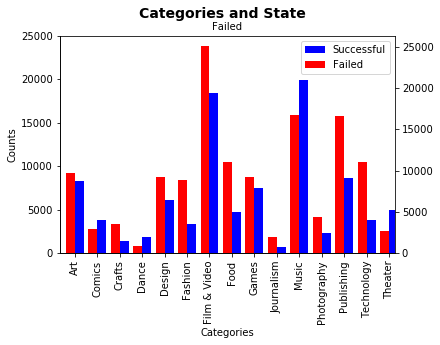

In [623]:
# combining bar plots

fig = plt.figure()
ax = fig.add_subplot(111)

# fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (12, 4))

ax2 = ax.twinx()

ks_cat_success.plot(kind = 'bar', ax = ax, position = 0, width = .4, color = 'b', linewidth = 3.0)
ks_cat_failed.plot(kind = 'bar', ax = ax2, position = 1, width = .4, color = 'r', linewidth = 3.0)

fig.suptitle("Categories and State", fontsize = 14, fontweight = "bold")
ax.set_title("Successful", fontsize = 10)
ax.set_ylim(0, 25000)
ax.set_title("Failed", fontsize = 10)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, ['Successful', 'Failed'], loc = 0)
ax2.legend().set_visible(False)
ax.spines["right"].set_visible(False) # get rid of right border
ax.spines["top"].set_visible(False) # get rid of top border
ax.set_xlabel("Categories") # label x-axes
ax.set_ylabel("Counts") # label y-axes
for tick in ax.get_xticklabels():
    tick.set_rotation(90) # rotate x-axes labels

  
plt.show()

We created a bar chart in order to visually identify whether there is any category that had more successful campaigns over failed campaigns in absolute terms. According to this bar chart, there are a few categories that match our criteria: comics, dance, music and theater. In these categories, the number of campaigns that were successful was greater relative to the number of failed campaigns. This finding suggests that people could increase their chances of running a successful campaign by creating a product that would match the previously mentioned 4 categories.

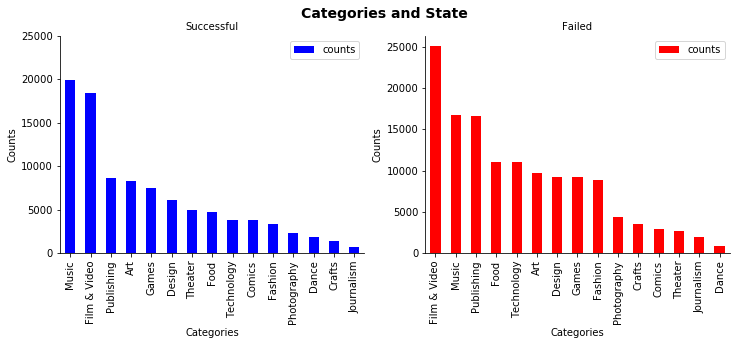

In [624]:
# creating bar plots

ks_cat_success = ks_cat_success.sort_values(by = ['counts'], ascending = False)
ks_cat_failed = ks_cat_failed.sort_values(by = ['counts'], ascending = False)

fig, ax = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (12, 4))

ks_cat_success.plot.bar(ax = ax[0], color = 'b', linewidth = 3.0)
ks_cat_failed.plot.bar(ax = ax[1], color = 'r', linewidth = 3.0)

fig.suptitle("Categories and State", fontsize = 14, fontweight = "bold")
ax[0].set_title("Successful", fontsize = 10)
ax[0].set_ylim(0, 25000)
ax[1].set_title("Failed", fontsize = 10)

for var in ax:
    var.spines["right"].set_visible(False) # get rid of right border
    var.spines["top"].set_visible(False) # get rid of top border
    var.set_xlabel("Categories") # label x-axes
    var.set_ylabel("Counts") # label y-axes
    for tick in var.get_xticklabels():
        tick.set_rotation(90) # rotate x-axes labels
        
plt.show()

Next we plotted two bar charts: one for successful campaigns and one for failed campaigns. In doing so, we wanted to understand what categories had the greatest number of campaings (either failed or successful). According to the first chart on the left, the were two categories that stood out: Music and Film & Video. Both of these categories had at least double the amount of successful campaigns as compared to other categories. From this graph we could conclude that by creating a project that fits into one of those two categories is likely to increase the probability of campaigns success, because there are significantly more people willing to invest in these particular categories. 

However, having analyzed the graph to the right, we noticed that the same two categories (Film & Video and Music) also stood out as the ones where there were the greatest number of failed campaigns. This finding implies that there is most likely significant competition in those two categories which suggests that it would be harder to succeed by creating a project in those categories. 

Findings from of both of these charts are likely to be misleading at first sight, however, when they are analyzed in combination with the previous graph, they yield an important insight. This insight is that we need to analyze these charts in relative terms. Here, it is important to mention the previous bar chart where we displayed successful and failed projects on the same graph. There we could see the ratio of successful projects to failed projects, which would suggest us in which categories there is a higher probability to succeed. According to that graph, by running a campaign in comics, dance, music and theater categories, a person is more likely to succeed as compared to running a campaign in other categories.

#### Data by Name Length

Having analyzed successful and failed campaigns through the prism of categories, we continued our research by focusing on the name length of the projects.

In [625]:
# creating a new column for name length
# storing name lengths for corresponding campaign

ks_projects['name_length'] = ks_projects['name'].apply(lambda x: len(str(x))) 
ks_projects.head(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,name_length
1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220,failed,3,US,220,14
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1,failed,1,US,1,49
3,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283,canceled,14,US,1283,58
4,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375,successful,224,US,52375,20
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205,successful,16,US,1205,60


We created a new column name_length, which displayed the number of characters used in campaign's name for every entry.

In [626]:
# create new dataframe
ks_name_lengths = ks_projects.groupby(['name_length', "state"]).size().reset_index(name='counts')

# successful campaigns by name length (sorted by name_length)
ks_name_success = ks_name_lengths.drop(ks_name_lengths.index[ks_name_lengths.state != 'successful'])
ks_name_success.set_index('name_length', inplace=True)


In [627]:
# failed campaigns by name length (sorted by name_length)
ks_name_failed = ks_name_lengths.drop(ks_name_lengths.index[ks_name_lengths.state != 'failed'])
ks_name_failed.set_index('name_length', inplace=True)

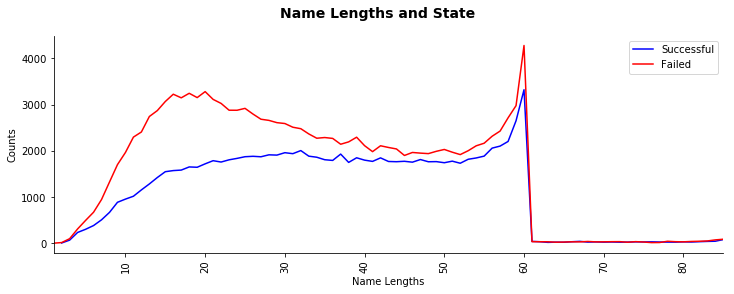

In [628]:
# plotting data into one graph

fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = False, figsize = (12, 4))

ks_name_success.plot(ax = ax, color = 'b', linewidth = 1.5)
ks_name_failed.plot(ax = ax, color = 'r', linewidth = 1.5)

fig.suptitle("Name Lengths and State", fontsize = 14, fontweight = "bold")
plt.legend(["Successful", "Failed"]) # create legend


ax.spines["right"].set_visible(False) # get rid of right border
ax.spines["top"].set_visible(False) # get rid of top border
ax.set_xlabel("Name Lengths") # label x-axis
ax.set_ylabel("Counts") # label y-axis

for tick in ax.get_xticklabels():
    tick.set_rotation(90) # rotate x-axis labels
        
plt.show()

Having organized our dataframes by successful and failed campaigns, we plotted our data. This graph depicts a significant gap between the number of successful and failed campaigns in the range from 3 characters to 30 characters. In this range, there was a great number of failed campaings in absolute terms, when compared with successful campaigns and when compared with failed camaigns that had more caracters in their name. This finding suggests that a campaign has a greater probability of being successful when its name falls into the range from 30 to 58 characters. In that range, the gap between successful and failed campaigns diminishes in absolute terms.

In [629]:
# successful campaigns (sorted by counts)
ks_name_success = ks_name_success.sort_values(by = ['counts'], ascending = False)
ks_name_success.head(10)

,state,counts
name_length,,
60,successful,3323
59,successful,2652
58,successful,2204
57,successful,2104
56,successful,2060
32,successful,2007
30,successful,1961
31,successful,1940
37,successful,1931


Our next step was to display the 10 most frequently used number of characters in successful campaign's name in order to check whether we visually identified the previously discussed range where in which there's a higher chance of getting a successful campaign.

In [630]:
# failed campaigns (sorted by counts)
ks_name_failed = ks_name_failed.sort_values(by = ['counts'], ascending = False)
ks_name_failed.head(10)

,state,counts
name_length,,
60,failed,4280
20,failed,3282
18,failed,3246
16,failed,3226
19,failed,3153
17,failed,3148
21,failed,3114
15,failed,3068
22,failed,3027


We performed the same action for failed campaign names and ensured that our previously stated ranges were correct and easy to identify.

#### Data by Goal Amount (USD)

In [631]:
ks_goals = ks_projects.groupby(["goal", "state"]).size().reset_index(name='counts')

# successful campaigns by goal amount (sorted by goal)
ks_goal_success = ks_goals.drop(ks_goals.index[ks_goals.state != 'successful'])
ks_goal_success = ks_goal_success.drop(ks_goal_success.index[ks_goal_success.counts < 300])
ks_goal_success = ks_goal_success.sort_values(by = ['goal'], ascending = True)

ks_goal_success.set_index('goal', inplace=True)

In [632]:
# failed campaigns by goal amount (sorted by goal)
ks_goal_failed = ks_goals.drop(ks_goals.index[ks_goals.state != 'failed'])
ks_goal_failed = ks_goal_failed.drop(ks_goal_failed.index[ks_goal_failed.counts < 300])
ks_goal_failed = ks_goal_failed.sort_values(by = ['goal'], ascending = True)

ks_goal_failed.set_index('goal', inplace=True)

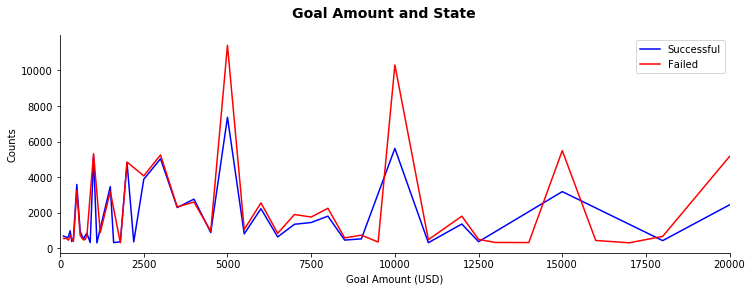

In [633]:
# plotting data into one graph

fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = False, figsize = (12, 4))

ks_goal_success.plot(ax = ax, color = 'b', linewidth = 1.5)
ks_goal_failed.plot(ax = ax, color = 'r', linewidth = 1.5)

fig.suptitle("Goal Amount and State", fontsize = 14, fontweight = "bold")
plt.legend(["Successful", "Failed"])


ax.spines["right"].set_visible(False) # get rid of right border
ax.spines["top"].set_visible(False) # get rid of top border
ax.set_xlabel("Goal Amount (USD)") # label x-axis
ax.set_ylabel("Counts") # label y-axis
ax.set_xlim(0, 20000) # set limit on x-axis
for tick in var.get_xticklabels():
    tick.set_rotation(90) # rotate x-axis labels
        
plt.show()

A few points to make about the above graph:
1. The overall pattern of successful and failed campaigns by goal amount is strikingly similar, i.e. not much of a prediction regarding success rate versus initial goal amount can be made solely based on this graph.
2. Despite the significant failed cases for 5000, 10000, and 15000 dollars, it seems like many campaigns aim for these three amounts. These amounts could be accepted as the most general target goals, and may reflect a lack of specificity.
3. In comparison, smaller goals (less than 3000 dollars) tend to have similar success vs failure rates.


In [634]:
# successful campaigns (sorted by counts)
ks_goal_success = ks_goal_success.sort_values(by = ['counts'], ascending = False)
ks_goal_success.head(10)

,state,counts
goal,,
5000.0,successful,7364
10000.0,successful,5616
1000.0,successful,5202
3000.0,successful,5035
2000.0,successful,4816
2500.0,successful,3883
500.0,successful,3593
1500.0,successful,3476
15000.0,successful,3191


In [635]:
# failed campaigns (sorted by counts)
ks_goal_failed = ks_goal_failed.sort_values(by = ['counts'], ascending = False)
ks_goal_failed.head(10)

,state,counts
goal,,
5000.0,failed,11404
10000.0,failed,10297
15000.0,failed,5491
1000.0,failed,5316
3000.0,failed,5251
20000.0,failed,5173
2000.0,failed,4850
25000.0,failed,4477
2500.0,failed,4074


Sorting the data by counts reinforces the above analysis.

#### Data by Duration (deadline - launched)

In [636]:
ks_projects['deadline'] = ks_projects['deadline'].apply(lambda x: x.split(" ")[0])
ks_projects['launched'] = ks_projects['launched'].apply(lambda x: x.split(" ")[0])
ks_projects['deadline'] = ks_projects['deadline'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
ks_projects['launched'] = ks_projects['launched'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [639]:
ks_projects['duration'] = ks_projects['deadline'] - ks_projects['launched']
ks_projects['duration'] = ks_projects['duration'].apply(lambda x: x.days)
ks_projects.set_index('name', inplace=True)
ks_projects.head(5)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,name_length,duration
name,,,,,,,,,,,,,
Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220,failed,3,US,220,14,45
ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1,failed,1,US,1,49,30
Community Film Project: The Art of Neighborhood Filmmaking,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283,canceled,14,US,1283,58,56
Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26,52375,successful,224,US,52375,20,35
Support Solar Roasted Coffee & Green Energy! SolarCoffee.co,Food,Food,USD,2014-12-21,1000.0,2014-12-01,1205,successful,16,US,1205,60,20


In [640]:
ks_durations = ks_projects.groupby(["duration", "state"]).size().reset_index(name='counts')

# successful campaigns by duration
ks_dur_success = ks_durations.drop(ks_durations.index[ks_durations.state != 'successful'])
ks_dur_success['d_bins'] = pd.cut(ks_dur_success['duration'], bins = [0,10,20,30,40,50,60,70,80,90,100], labels = False)
labels = np.array('0~10 10~20 20~30 30~40 40~50 50~60 60~70 70~80 80~90 90~100'.split())
ks_dur_success['d_bins'] = labels[ks_dur_success['d_bins']]
ks_dur_success.set_index('duration', inplace = True)
ks_dur_success.head(5)

,state,counts,d_bins
duration,,,
1,successful,19,0~10
2,successful,38,0~10
3,successful,47,0~10
4,successful,46,0~10
5,successful,142,0~10


In [641]:
# failed campaigns by duration
ks_dur_failed = ks_durations.drop(ks_durations.index[ks_durations.state != 'failed'])
ks_dur_failed['d_bins'] = pd.cut(ks_dur_failed['duration'], bins = [0,10,20,30,40,50,60,70,80,90,100], labels = False)
labels = np.array('0~10 10~20 20~30 30~40 40~50 50~60 60~70 70~80 80~90 90~100'.split())
ks_dur_failed['d_bins'] = labels[ks_dur_failed['d_bins']]
ks_dur_failed.set_index('duration', inplace = True)
ks_dur_failed.head(5)

,state,counts,d_bins
duration,,,
1,failed,39,0~10
2,failed,57,0~10
3,failed,86,0~10
4,failed,70,0~10
5,failed,173,0~10


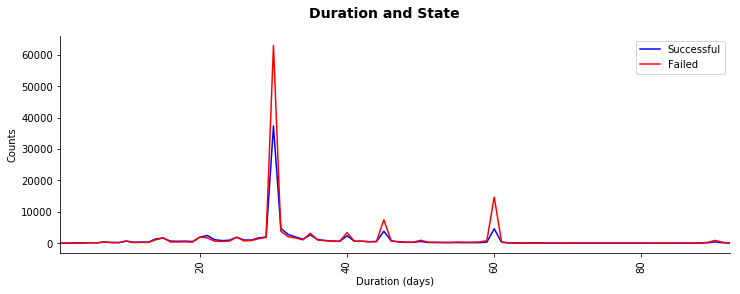

In [643]:
# plotting data into one graph

fig, ax = plt.subplots(nrows = 1, ncols = 1, sharex = False, figsize = (12, 4))

fig.suptitle("Duration and State", fontsize = 14, fontweight = "bold")
ks_dur_success.plot(ax = ax, color = 'b', linewidth = 1.5)
ks_dur_failed.plot(ax = ax,color = 'r', linewidth = 1.5)
plt.legend(["Successful", "Failed"])

ax.spines["right"].set_visible(False) # get rid of right border
ax.spines["top"].set_visible(False) # get rid of top border
ax.set_xlabel("Duration (days)") # label x-axis
ax.set_ylabel("Counts") # label y-axis

for tick in ax.get_xticklabels():
    tick.set_rotation(90) # rotate x-axis labels
        
plt.show()

Based on the duration graph above, it is clear that a significant number of campaigns will have a duration of about 30 days. It might also seem risky to set a duration of anything other than the "popular" number of days. However, we cannot assume a pattern or outcome solely based on this type of graph.

## Conclusion
Overall, our project concludes that campaigns under categories like comics, dance, music and theater have a higher chance of being successful. Along with that, campaign name length within the range of 30 to 58 characters saw better success in absolute terms. Goal amount and duration show that campaigners tend to choose the most widely selected numbers, but these factors cannot safely predict a pattern on their own.

Still, there are several limitations to consider when looking at this project:
- The dataset used does not include specific details like tier information and location (state)
- The data has not been standardized for significant analysis
- There are other unobservable aspects that contribute to campaigns success such as: the product itself, marketing strategy, how well the campaign was publicized, etc.


In the future, we would take these limitions into account to improve the project. Our next steps include:
- Looking into more factors (location within the U.S., tier information, etc)
- Comparing the duration of the project with the goal amount and doing a reanalysis
- Standardizing the data

While working on this project, we faced quite a few challenges:
- Converting the dataset file to the appropriate encoding and working with the data according to this
- Figuring out how to properly calculate and store the duration
- Catching the fact that column names had a space character at the end & data types were not stored as we hoped, which required conversions and cleaning up

One thing is clear - no one can guarantee a successfully funded campaign. There are so many different factors to consider, and the slightest difference in a decision may or may not affect one's chances. Nevertheless, there are clear patterns in the outcome of campaigns on Kickstarter in the past few years. Perhaps with more information and deeper analysis, we can provide an improved form of guidance that pushes new campaigners off to a better start. We wish the best of luck to all!